# Summer School on Biomedical Imaging with Deep Learning

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/albarqounilab/BILD-Summer-School/blob/main/notebooks/day2/segmentation_solution.ipynb)

![alt_text](https://raw.githubusercontent.com/albarqounilab/BILD-Summer-School/refs/heads/main/images/helpers/notebook-banner.png)

BILD 2025 is organized under the umbrella of the [Strategic Arab-German Network for Affordable and Democratized AI in Healthcare (SANAD)](https://albarqouni.github.io/funded/sanad/), uniting academic excellence and technological innovation across borders. This year’s edition is organized by the [Albarqouni Lab](https://albarqouni.github.io/) at the [University Hospital Bonn](https://www.ukbonn.de/) and the [University of Bonn](https://www.uni-bonn.de/en). We are proud to partner with leading institutions in the region—Lebanese American University, University of Tunis El Manar, and Duhok Polytechnic University — to deliver a truly international learning experience. Over five intensive days in Tunis, you will explore cutting-edge deep-learning techniques for medical imaging through expert lectures, hands-on labs, and collaborative case studies. Engage with peers and faculty from Germany, Lebanon, Iraq, and Tunisia as you develop practical skills in building and deploying AI models for real-world healthcare challenges. We look forward to an inspiring week of interdisciplinary exchange and the shared commitment to advancing affordable, life-saving AI in medicine.


# Introduction to Python for Biomedical Imaging
## General Introduction to Python

Python is a high-level, interpreted programming language known for its simplicity, readability, and flexibility.
It has become the go-to language for data science, machine learning, and biomedical image analysis because:

- It’s easy to learn, even for beginners.

- It has a vast ecosystem of libraries for mathematics, image processing, and deep learning.

- It’s open-source and supported by an active community.

In biomedical imaging, Python is often used to:

- Load and process medical images (X-rays, MRIs, CT scans).

- Apply image transformations and filtering.

- Train and evaluate deep learning models for segmentation, classification, and detection.

In this notebook, we’ll first cover basic Python concepts and then slowly connect them to real biomedical imaging tasks.

## Dataset

We will use the [Chest X-ray Pneumonia Dataset](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/) [1]. The dataset contains a collection of posterior–anterior chest X-ray images from pediatric patients (ages 1–5) who were either healthy or diagnosed with pneumonia. The dataset was collected from Guangzhou Women and Children’s Medical Center, Guangzhou, China. All chest X-ray imaging was performed as part of the patients’ routine clinical care.

The dataset is divided into two categories:

- NORMAL: Healthy chest X-rays with clear lung fields.

- PNEUMONIA: Chest X-rays showing lung opacities indicative of pneumonia infection.

This dataset is widely used for medical imaging classification tasks and is well-suited for demonstrating Python and PyTorch workflows in biomedical image analysis.

[1] Kermany, D., Zhang, K., & Goldbaum, M. (2018). Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification. Kaggle.
(https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia)

##Python program files

* Python code is usually stored in text files with the file ending "`.py`":

        myprogram.py

* Every line in a Python program file is assumed to be a Python statement, or part thereof.

    * The only exception is comment lines, which start with the character `#` (optionally preceded by an arbitrary number of white-space characters, i.e., tabs or spaces). Comment lines are usually ignored by the Python interpreter.

In [13]:
#@title Checking Your Python Version
import sys
print("Python version:", sys.version)

Python version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


In [14]:
#@title Printing Text
print("Hello, Summer School 2025!")
print("Welcome to Python for Biomedical Imaging 🚀")

Hello, Summer School 2025!
Welcome to Python for Biomedical Imaging 🚀


## Variables and types
### Symbol names

Variable names in Python can contain alphanumerical characters `a-z`, `A-Z`, `0-9` and some special characters such as `_`. Normal variable names must start with a letter.

By convention, variable names start with a lower-case letter, and Class names start with a capital letter.

In addition, there are a number of Python keywords that cannot be used as variable names. These keywords are:

    and, as, assert, break, class, continue, def, del, elif, else, except,
    exec, finally, for, from, global, if, import, in, is, lambda, not, or,
    pass, print, raise, return, try, while, with, yield



In [16]:
patient_id = "P001"          # String
age = 45                     # Integer
weight_kg = 72.5             # Float
is_smoker = False            # Boolean

print("Patient ID:", patient_id)
print("Age:", age)
print("Weight (kg):", weight_kg)
print("Smoker:", is_smoker)


Patient ID: P001
Age: 45
Weight (kg): 72.5
Smoker: False


### Assignment



The assignment operator in Python is `=`. Python is a dynamically typed language, so we do not need to specify the type of a variable when we create one.

Assigning a value to a new variable creates the variable:

In [1]:
# variable assignments
x = 1.0
my_variable = 12.2

Although not explicitly specified, a variable does have a type associated with it. The type is derived from the value that was assigned to it.

In [2]:
type(x)

float

If we assign a new value to a variable, its type can change.

In [3]:
x = 1

In [4]:
type(x)

int

If we try to use a variable that has not yet been defined we get an `NameError`:

In [5]:
print(y)

NameError: name 'y' is not defined

### Fundamental types

In [6]:
# integers
x = 1
type(x)

int

In [7]:
# float
x = 1.0
type(x)

float

In [8]:
# boolean
b1 = True
b2 = False

type(b1)

bool

In [9]:
# complex numbers: note the use of `j` to specify the imaginary part
x = 1.0 - 1.0j
type(x)

complex

In [10]:
print(x)

(1-1j)


In [11]:
print(x.real, x.imag)

1.0 -1.0


### Type utility functions


The module `types` contains a number of type name definitions that can be used to test if variables are of certain types:

In [12]:
import types

# print all types defined in the `types` module
print(dir(types))

['AsyncGeneratorType', 'BuiltinFunctionType', 'BuiltinMethodType', 'CellType', 'ClassMethodDescriptorType', 'CodeType', 'CoroutineType', 'DynamicClassAttribute', 'EllipsisType', 'FrameType', 'FunctionType', 'GeneratorType', 'GenericAlias', 'GetSetDescriptorType', 'LambdaType', 'MappingProxyType', 'MemberDescriptorType', 'MethodDescriptorType', 'MethodType', 'MethodWrapperType', 'ModuleType', 'NoneType', 'NotImplementedType', 'SimpleNamespace', 'TracebackType', 'UnionType', 'WrapperDescriptorType', '_GeneratorWrapper', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_calculate_meta', '_cell_factory', 'coroutine', 'new_class', 'prepare_class', 'resolve_bases']


In [13]:
x = 1.0

# check if the variable x is a float
type(x) is float

True

In [14]:
# check if the variable x is an int
type(x) is int

False

We can also use the `isinstance` method for testing types of variables:

In [15]:
isinstance(x, float)

True

In [15]:
#@title Python as a Calculator
a = 10
b = 3

print("Addition:", a + b)
print("Subtraction:", a - b)
print("Multiplication:", a * b)
print("Division:", a / b)
print("Integer Division:", a // b)
print("Remainder:", a % b)
print("Power:", a ** b)


Addition: 13
Subtraction: 7
Multiplication: 30
Division: 3.3333333333333335
Integer Division: 3
Remainder: 1
Power: 1000


* The boolean operators are spelled out as the words `and`, `not`, `or`.

In [16]:
True and False

False

In [17]:
not False

True

In [18]:
True or False

True

* Comparison operators `>`, `<`, `>=` (greater or equal), `<=` (less or equal), `==` equality, `is` identical.

In [19]:
2 > 1, 2 < 1

(True, False)

In [20]:
2 > 2, 2 < 2

(False, False)

In [21]:
2 >= 2, 2 <= 2

(True, True)

In [22]:
# equality
[1,2] == [1,2]

True

In [23]:
# objects identical?
l1 = l2 = [1,2]

l1 is l2

True

## Compound types: Strings, List and dictionaries



### Strings

Strings are the variable type that is used for storing text messages.

In [24]:
s = "Hello world"
type(s)

str

In [25]:
# length of the string: the number of characters
len(s)

11

In [26]:
# replace a substring in a string with something else
s2 = s.replace("world", "test")
print(s2)

Hello test


We can index a character in a string using `[]`:

In [27]:
s[0]

'H'

Indexing start at 0!

We can extract a part of a string using the syntax `[start:stop]`, which extracts characters between index `start` and `stop` -1 (the character at index `stop` is not included):

In [28]:
s[0:5]

'Hello'

In [29]:
s[4:5]

'o'

If we omit either (or both) of `start` or `stop` from `[start:stop]`, the default is the beginning and the end of the string, respectively:

In [30]:
s[:5]

'Hello'

In [31]:
s[6:]

'world'

### List

Lists are very similar to strings, except that each element can be of any type.

The syntax for creating lists in Python is `[...]`:

In [32]:
l = [1,2,3,4]

print(type(l))
print(l)

<class 'list'>
[1, 2, 3, 4]


In [33]:
l[0]

1

Elements in a list do not all have to be of the same type:

In [34]:
l = [1, 'a', 1.0, 1-1j]

print(l)

[1, 'a', 1.0, (1-1j)]


In [35]:
s

'Hello world'

In [36]:
# convert a string to a list by type casting:
s2 = list(s)

s2

['H', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']

See `help(list)` for more details, or read the online documentation

### Tuples

Tuples are like lists, except that they cannot be modified once created, that is they are *immutable*.

In Python, tuples are created using the syntax `(..., ..., ...)`, or even `..., ...`:

In [38]:
point = (10, 20)

print(point, type(point))

(10, 20) <class 'tuple'>


In [39]:
point = 10, 20

print(point, type(point))

(10, 20) <class 'tuple'>


In [40]:
x, y = point

print("x =", x)
print("y =", y)

x = 10
y = 20


If we try to assign a new value to an element in a tuple we get an error:

In [41]:
point[0] = 20

TypeError: 'tuple' object does not support item assignment

### Dictionaries

Dictionaries are also like lists, except that each element is a key-value pair. The syntax for dictionaries is `{key1 : value1, ...}`:

In [42]:
params = {"parameter1" : 1.0,
          "parameter2" : 2.0,
          "parameter3" : 3.0,}

print(type(params))
print(params)

<class 'dict'>
{'parameter1': 1.0, 'parameter2': 2.0, 'parameter3': 3.0}


In [43]:
print("parameter1 = " + str(params["parameter1"]))
print("parameter2 = " + str(params["parameter2"]))
print("parameter3 = " + str(params["parameter3"]))

parameter1 = 1.0
parameter2 = 2.0
parameter3 = 3.0


In [44]:
params["parameter1"] = "A"
params["parameter2"] = "B"

# add a new entry
params["parameter4"] = "D"

print("parameter1 = " + str(params["parameter1"]))
print("parameter2 = " + str(params["parameter2"]))
print("parameter3 = " + str(params["parameter3"]))
print("parameter4 = " + str(params["parameter4"]))

parameter1 = A
parameter2 = B
parameter3 = 3.0
parameter4 = D


## Control Flow

### Conditional statements: if, elif, else

The Python syntax for conditional execution of code uses the keywords `if`, `elif` (else if), `else`:

In [45]:
statement1 = False
statement2 = False

if statement1:
    print("statement1 is True")

elif statement2:
    print("statement2 is True")

else:
    print("statement1 and statement2 are False")

statement1 and statement2 are False


## Loops

In Python, loops can be programmed in a number of different ways. The most common is the `for` loop, which is used together with iterable objects, such as lists. The basic syntax is:

### **`for` loops**:

In [46]:
for x in [1,2,3]:
    print(x)

1
2
3


The `for` loop iterates over the elements of the supplied list, and executes the containing block once for each element. Any kind of list can be used in the `for` loop. For example:

In [47]:
for x in range(4): # by default range start at 0
    print(x)

0
1
2
3


In [48]:
for word in ["scientific", "computing", "with", "python"]:
    print(word)

scientific
computing
with
python


### `while` loops:

In [49]:
i = 0

while i < 5:
    print(i)

    i = i + 1

print("done")

0
1
2
3
4
done


## Functions

A function in Python is defined using the keyword `def`, followed by a function name, a signature within parentheses `()`, and a colon `:`. The following code, with one additional level of indentation, is the function body.

In [50]:
def func0():
    print("test")

In [51]:
func0()

test


Functions that returns a value use the `return` keyword:

In [52]:
def square(x):
    """
    Return the square of x.
    """
    return x ** 2

In [53]:
square(4)

16

We can return multiple values from a function using tuples (see above):

In [54]:
def powers(x):
    """
    Return a few powers of x.
    """
    return x ** 2, x ** 3, x ** 4

In [55]:
powers(3)

(9, 27, 81)

## Classes

Classes are the key features of object-oriented programming. A class is a structure for representing an object and the operations that can be performed on the object.

In Python a class can contain *attributes* (variables) and *methods* (functions).

A class is defined almost like a function, but using the `class` keyword, and the class definition usually contains a number of class method definitions (a function in a class).

* Each class method should have an argument `self` as its first argument. This object is a self-reference.

* Some class method names have special meaning, for example:

    * `__init__`: The name of the method that is invoked when the object is first created.
    * `__str__` : A method that is invoked when a simple string representation of the class is needed, as for example when printed.
    * There are many more, see http://docs.python.org/2/reference/datamodel.html#special-method-names

In [56]:
class Point:
    """
    Simple class for representing a point in a Cartesian coordinate system.
    """

    def __init__(self, x, y):
        """
        Create a new Point at x, y.
        """
        self.x = x
        self.y = y

    def translate(self, dx, dy):
        """
        Translate the point by dx and dy in the x and y direction.
        """
        self.x += dx
        self.y += dy

    def __str__(self):
        return("Point at [%f, %f]" % (self.x, self.y))

To create a new instance of a class:

In [57]:
p1 = Point(0, 0) # this will invoke the __init__ method in the Point class

print(p1)         # this will invoke the __str__ method

Point at [0.000000, 0.000000]


To invoke a class method in the class instance `p`:

In [58]:
p2 = Point(1, 1)

p1.translate(0.25, 1.5)

print(p1)
print(p2)

Point at [0.250000, 1.500000]
Point at [1.000000, 1.000000]


##  Downloading the Dataset from Kaggle

In [17]:
# Install kagglehub
!pip install kagglehub --quiet

# Import and download dataset
import kagglehub

# Download the latest version of the Chest X-ray Pneumonia dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("✅ Dataset downloaded!")
print("📂 Path to dataset files:", path)


✅ Dataset downloaded!
📂 Path to dataset files: /kaggle/input/chest-xray-pneumonia


# Explore Dataset Structure

## Loading an Image
Use `imageio` to load a DICOM or JPEG image; image data becomes a NumPy array

In [20]:
import imageio
import os

# Pick one sample image from the dataset
sample_image_path = os.path.join(path, "chest_xray/train/NORMAL/IM-0115-0001.jpeg")

# Load the image
img = imageio.imread(sample_image_path)

# Show type and shape
print("📂 File:", sample_image_path)
print("📄 Type:", type(img))
print("📏 Shape:", img.shape)  # (height, width, channels)


📂 File: /kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0115-0001.jpeg
📄 Type: <class 'numpy.ndarray'>
📏 Shape: (1858, 2090)


/tmp/ipython-input-1333842524.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(sample_image_path)


 ## Visualizing the Image
 Show the image using `matplotlib`, apply grayscale colormap and adjust contrast

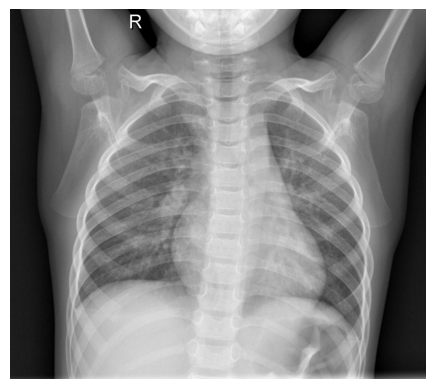

In [21]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

## Visualize Random Sample Images from Each Category
This code randomly selects and displays one image from each of the "NORMAL" and "PNEUMONIA" categories in the training dataset. Visualizing sample images helps to get an intuitive understanding of the data and verify image quality and labeling.

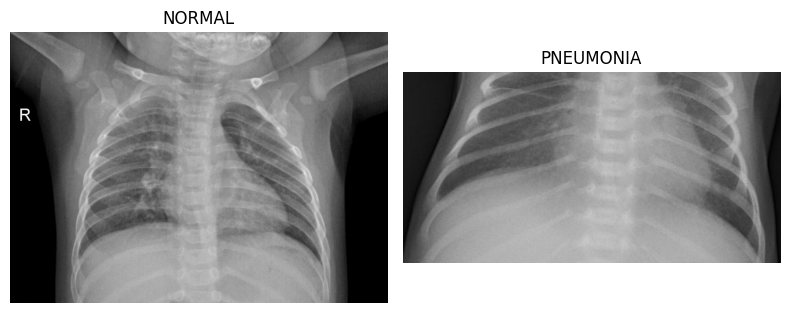

In [23]:
import os
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

# Define the path to the training dataset folder
train_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"

# Choose random images from NORMAL and PNEUMONIA categories
categories = ["NORMAL", "PNEUMONIA"]
plt.figure(figsize=(8, 4))

for i, category in enumerate(categories):
    category_path = os.path.join(train_path, category)
    image_file = random.choice(os.listdir(category_path))
    img_path = os.path.join(category_path, image_file)
    img = mpimg.imread(img_path)

    plt.subplot(1, 2, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(category)
    plt.axis("off")

plt.tight_layout()
plt.show()


## Dataset Structure and Image Counts
This code inspects the main folders in the dataset directory and counts the number of images in each category within the training set. It helps understand the dataset organization and verify class distribution before starting model training.

In [24]:
import os

# Explore top-level folders
for folder in os.listdir(path):
    print("📁", folder)

# Example: Count images in each category
train_path = os.path.join(path, "chest_xray/train")
for category in os.listdir(train_path):
    category_path = os.path.join(train_path, category)
    num_images = len(os.listdir(category_path))
    print(f"{category}: {num_images} images in training set")

📁 chest_xray
PNEUMONIA: 3875 images in training set
NORMAL: 1341 images in training set


## Inspect Basic Properties of a Sample Image
This code opens a sample image from the "NORMAL" category using the PIL library and prints out key properties such as image format, color mode, and dimensions. Understanding these properties is essential for preprocessing and ensuring data consistency.

In [25]:
from PIL import Image

# Open a sample image
sample_img_path = os.path.join(train_path, "NORMAL", os.listdir(os.path.join(train_path, "NORMAL"))[0])
sample_img = Image.open(sample_img_path)

# Display basic properties
print(f"Image format: {sample_img.format}")
print(f"Image mode (color channels): {sample_img.mode}")
print(f"Image size (width x height): {sample_img.size}")


Image format: JPEG
Image mode (color channels): L
Image size (width x height): (1336, 1128)


#Visualizing Image Intensity and Profiles with Histograms & Curves

Visualize the distribution of pixel values and intensity changes along a selected row of the image. These plots help understand image contrast and structure.

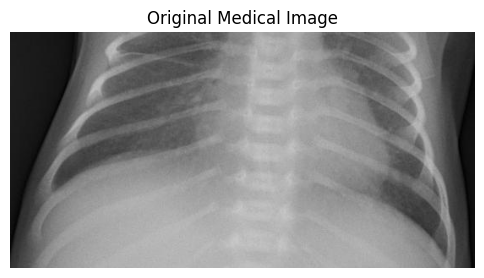

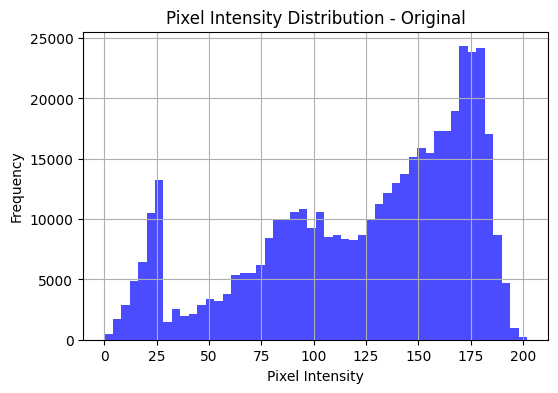

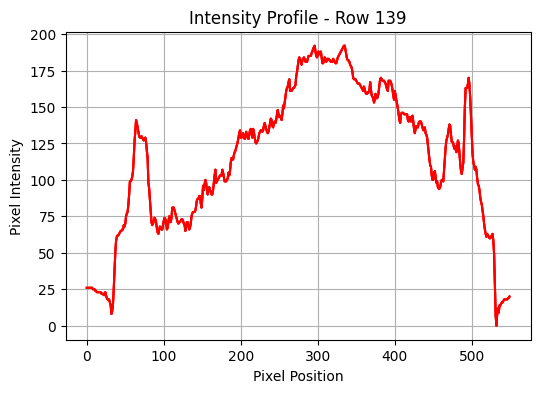

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Show the original image
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap='gray')
plt.title("Original Medical Image")
plt.axis('off')
plt.show()

# Histogram of pixel intensities
plt.figure(figsize=(6, 4))
plt.hist(img.ravel(), bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution - Original")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Intensity profile along the middle row
row_index = img.shape[0] // 2
intensity_profile = img[row_index, :]

plt.figure(figsize=(6, 4))
plt.plot(intensity_profile, color='red')
plt.title(f"Intensity Profile - Row {row_index}")
plt.xlabel("Pixel Position")
plt.ylabel("Pixel Intensity")
plt.grid(True)
plt.show()


#Filtering to Reduce Noise and Visualize Changes

Apply a Gaussian blur to smooth the image and observe changes in the pixel intensity histogram.

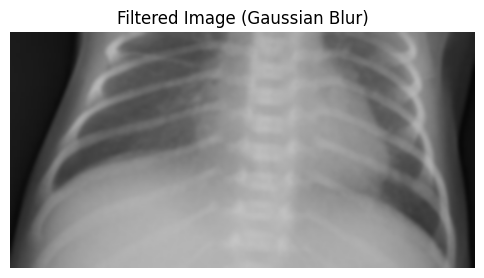

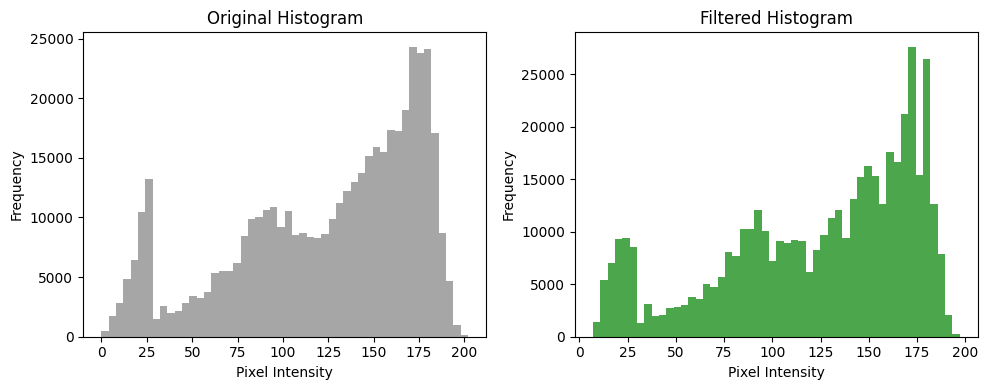

In [30]:
from scipy.ndimage import gaussian_filter

# Apply Gaussian filter with sigma=2
filtered_img = gaussian_filter(img, sigma=2)

# Display the filtered image
plt.figure(figsize=(6, 6))
plt.imshow(filtered_img, cmap='gray')
plt.title("Filtered Image (Gaussian Blur)")
plt.axis('off')
plt.show()

# Compare histograms before and after filtering
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(img.ravel(), bins=50, color='gray', alpha=0.7)
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(filtered_img.ravel(), bins=50, color='green', alpha=0.7)
plt.title("Filtered Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()
